<a href="https://colab.research.google.com/github/anil-iqbal/Malaria-Detection-CNN/blob/master/Malaria_Detection_CNN_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 40.8MB/s 
     |████████████████████████████████| 4.3MB 36.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/cell_images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
from matplotlib.image import imread

2.0.0-rc0


In [ ]:
os.listdir('/content/cell_images')

['train', 'test']

In [ ]:
test_path

NameError: ignored

In [ ]:
from matplotlib.image import imread

In [ ]:
data_dir = ('/content/cell_images')

In [ ]:
valid_path=data_dir+'/content/cell_images/test'
train_path=data_dir+'/content/cell_images/train'

In [ ]:
train_path

'/content/cell_images/content/cell_images/train'

In [ ]:
os.listdir('/content/cell_images/train/parasitized/')[0]

In [ ]:
#parasitized_dir =os.listdir('/content/cell_images/train/parasitized')
#uninfected_dir  =os.listdir('/content/cell_images/train/uninfected')

In [ ]:
len(os.listdir('/content/cell_images/train/parasitized'))


12480

In [ ]:
len(os.listdir('/content/cell_images/test/parasitized'))

1300

In [ ]:
len(os.listdir('/content/cell_images/train/uninfected'))

12480

In [ ]:
len(os.listdir('/content/cell_images/test/uninfected'))

1300

In [ ]:
parasitized_cell=('/content/cell_images/train/parasitized/'+'C137P98ThinF_IMG_20151005_155444_cell_97.png')

In [ ]:
parasitized_cell

'/content/cell_images/train/parasitized/C137P98ThinF_IMG_20151005_155444_cell_97.png'

In [ ]:
imread(parasitized_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
imread(parasitized_cell).shape

(142, 109, 3)

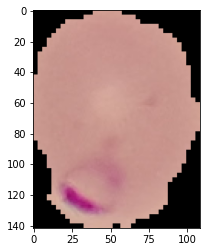

In [ ]:
plt.imshow(imread(parasitized_cell))

In [ ]:
os.listdir('/content/cell_images/train/uninfected/')[0]

'C132P93ThinF_IMG_20151004_152505_cell_17.png'

In [ ]:
uninfected_cell=('/content/cell_images/train/uninfected/'+'C132P93ThinF_IMG_20151004_152505_cell_17.png')

In [ ]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
imread(uninfected_cell).shape

(127, 121, 3)

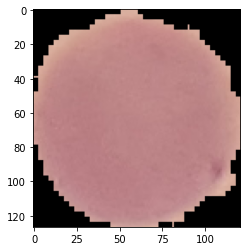

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir('/content/cell_images/test/uninfected/'):

    img = imread('/content/cell_images/test/uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


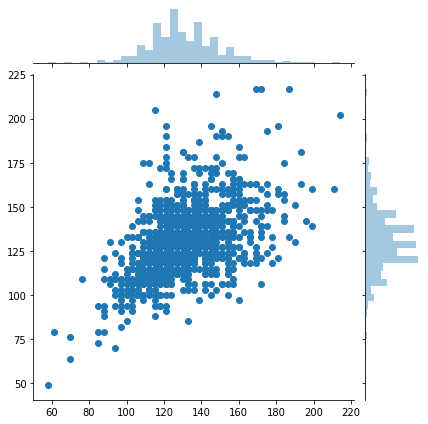

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
image_width=130
image_height=130

In [ ]:
datagen=ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [ ]:
train_set = datagen.flow_from_directory('/content/cell_images/train',target_size=(image_width, image_height),
                                                 class_mode='binary',
                                                 batch_size=20,
                                                 )

test_set = datagen.flow_from_directory('/content/cell_images/test',target_size=(image_width,image_height),
                                                 class_mode='binary',
                                                 batch_size=20,
                                                 )


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
#img_height=64
#img_width=64

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3), input_shape=(image_width, image_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_set, 
                            steps_per_epoch= len(train_set),
                            epochs=10,
                            validation_data=test_set,
                            validation_steps=len(test_set))

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1248/1248 [==============================] - 178s 143ms/step - loss: 0.5509 - accuracy: 0.7249 - val_loss: 0.3392 - val_accuracy: 0.9077
Epoch 2/10
1248/1248 [==============================] - 169s 136ms/step - loss: 0.3113 - accuracy: 0.9159 - val_loss: 0.2840 - val_accuracy: 0.9250
Epoch 3/10
1248/1248 [==============================] - 168s 134ms/step - loss: 0.2197 - accuracy: 0.9382 - val_loss: 0.1977 - val_accuracy: 0.9362
Epoch 4/10
1248/1248 [==============================] - 166s 133ms/step - loss: 0.1809 - accuracy: 0.9459 - val_loss: 0.1833 - val_accuracy: 0.9408
Epoch 5/10
1248/1248 [==============================] - 164s 132ms/step - loss: 0.1679 - accuracy: 0.9487 - val_loss: 0.1564 - val_accuracy: 0.9515
Epoch 6/10
1248/1248 [==============================] - 164s 131ms/step - loss: 0.1640 - accuracy: 0.9512 - val_loss: 0.1689 - val_accuracy: 0.9442
Epoch 7/10
1248/12

In [ ]:
history.history

{'accuracy': [0.7249379,
  0.9158586,
  0.9382162,
  0.9458691,
  0.94871384,
  0.95119804,
  0.9511579,
  0.95187914,
  0.9511579,
  0.9532815],
 'loss': [0.5508990070156222,
  0.311368702399393,
  0.21974697285327682,
  0.18086614842655802,
  0.1678833428397745,
  0.16402750443740313,
  0.15966583488037986,
  0.15474593803308642,
  0.15096248563545328,
  0.14817161683795607],
 'val_accuracy': [0.9076923,
  0.925,
  0.9361538,
  0.94076926,
  0.95153844,
  0.9442308,
  0.95076925,
  0.9473077,
  0.94846153,
  0.95],
 'val_loss': [0.3392249473012411,
  0.2840454357461287,
  0.1977254694327712,
  0.18332340152790913,
  0.15636925370647356,
  0.168938515908443,
  0.14948087175591634,
  0.15560012316474547,
  0.14812692303497058,
  0.1598511091899127]}

In [ ]:
metrics=pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.550899,0.724938,0.339225,0.907692
1,0.311369,0.915859,0.284045,0.925000
2,0.219747,0.938216,0.197725,0.936154
3,0.180866,0.945869,0.183323,0.940769
4,0.167883,0.948714,0.156369,0.951538
5,0.164028,0.951198,0.168939,0.944231
6,0.159666,0.951158,0.149481,0.950769
7,0.154746,0.951879,0.155600,0.947308
8,0.150962,0.951158,0.148127,0.948462
9,0.148172,0.953282,0.159851,0.950000


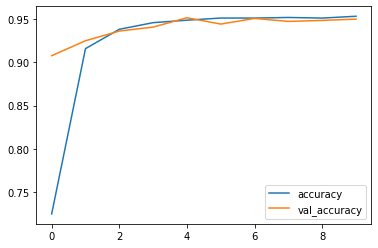

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

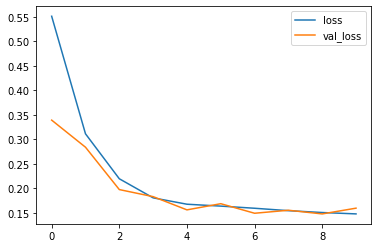

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
train_set.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
model.evaluate_generator(test_set)

[0.1567634204832407, 0.9503846]

In [ ]:
pred= model.predict_generator(test_set)

In [ ]:
predictions = pred > 0.5

In [ ]:
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
len(pred)

2600

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report (test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1300
           1       0.51      0.53      0.52      1300

    accuracy                           0.52      2600
   macro avg       0.52      0.52      0.52      2600
weighted avg       0.52      0.52      0.52      2600



In [ ]:
confusion_matrix(test_set.classes, predictions)

array([[653, 647],
       [613, 687]])